Superstore sales data analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('train.csv')
print(data)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode   
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class  \
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City   
0       CG-12520       Claire Gute   Consumer  United 

In [4]:
# print(data.head(3))
# print(data.tail(3))
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
#filling null
data["Postal Code"].fillna(0,inplace=True)
data["Postal Code"]=data["Postal Code"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
#checking for duplicates
dupli=data.duplicated()
print(dupli.count)

<bound method Series.count of 0       False
1       False
2       False
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Length: 9800, dtype: bool>


In [7]:
#making classification in customer
customers=data['Segment'].unique()
print(customers)

['Consumer' 'Corporate' 'Home Office']


In [8]:
no_customer=data['Segment'].value_counts().reset_index()
no_customer=no_customer.rename(columns={'Segment':'Type_customer'})
print(no_customer)

  Type_customer  count
0      Consumer   5101
1     Corporate   2953
2   Home Office   1746


([<matplotlib.patches.Wedge at 0x1d0d63c6290>,
 [Text(-0.07082911608159113, 1.0977172843292122, 'Consumer'),
  Text(-0.5228074775852011, -0.9678183411059121, 'Corporate'),
  Text(0.9321462996405261, -0.584040474681742, 'Home Office')],
 [Text(-0.03863406331723152, 0.5987548823613884, '52.1%'),
  Text(-0.28516771504647326, -0.5279009133304975, '30.1%'),
  Text(0.5084434361675596, -0.31856753164458657, '17.8%')])

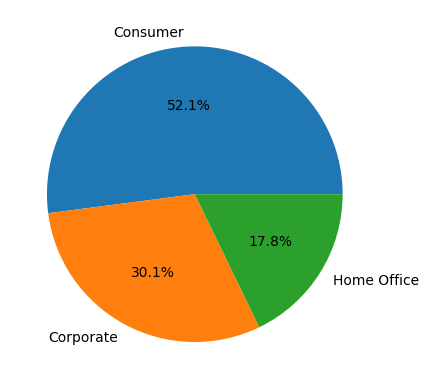

In [9]:
plt.pie(no_customer['count'], labels=no_customer['Type_customer'], autopct='%1.1f%%')

<BarContainer object of 3 artists>

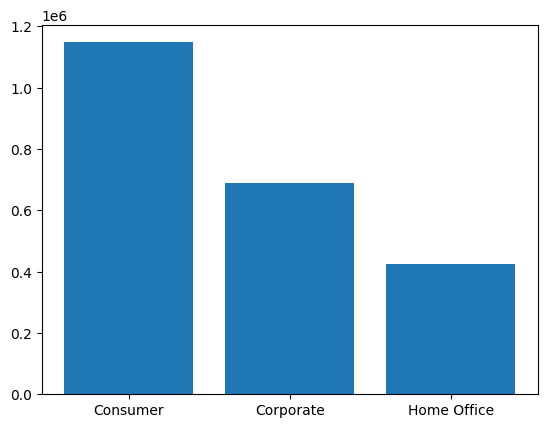

In [10]:
#sales per segment
sales_per_segment=data.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment=sales_per_segment.rename(columns={'Segment':'Type_Customer'})
plt.bar(sales_per_segment['Type_Customer'],sales_per_segment['Sales'])

([<matplotlib.patches.Wedge at 0x1d0d98b2bd0>,
 [Text(-0.02642083976554102, 1.0996826538715994, 'Consumer'),
  Text(-0.5902005886829921, -0.9282581888236967, 'Corporate'),
  Text(0.913814451312435, -0.612326014940206, 'Home Office')],
 [Text(-0.014411367144840556, 0.5998269021117814, '50.8%'),
  Text(-0.3219275938270865, -0.5063226484492891, '30.4%'),
  Text(0.49844424617041905, -0.33399600814920327, '18.8%')])

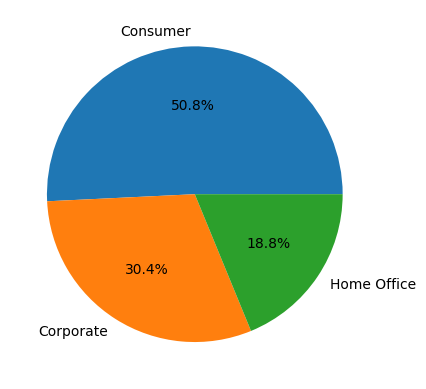

In [11]:
plt.pie(sales_per_segment['Sales'], labels=sales_per_segment['Type_Customer'], autopct='%1.1f%%')

In [12]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


State    49
Sales    49
dtype: int64


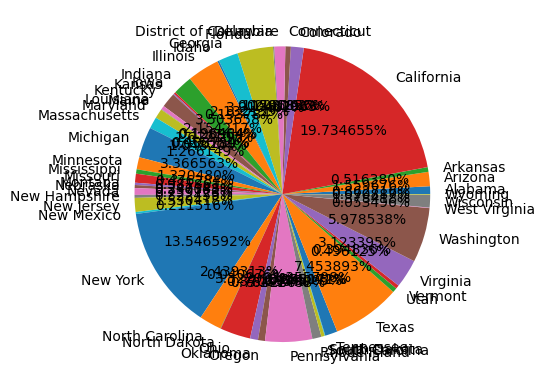

In [13]:
#sales per state
sales_per_state=data.groupby('State')['Sales'].sum().reset_index()
plt.pie(sales_per_state['Sales'], labels=sales_per_state['State'], autopct='%1f%%')
print(sales_per_state.count())

In [14]:
print(sales_per_state['Sales'].mode()[0])


919.91


In [15]:
customer_order_frequency=data.groupby(['Customer ID','Customer Name','Segment'])['Order ID'].count().reset_index()
customer_order_frequency.rename(columns={'Order ID':'Total Order'},inplace=True)

In [16]:
repeat_customer=customer_order_frequency[customer_order_frequency['Total Order']>=1]
sort_repeat_customer=repeat_customer.sort_values(by='Total Order',ascending=False)
print(sort_repeat_customer.head(10).reset_index(drop=True))

  Customer ID        Customer Name      Segment  Total Order
0    WB-21850        William Brown     Consumer           35
1    PP-18955           Paul Prost  Home Office           34
2    MA-17560         Matt Abelman  Home Office           34
3    JL-15835             John Lee     Consumer           33
4    CK-12205  Chloris Kastensmidt     Consumer           32
5    SV-20365          Seth Vernon     Consumer           32
6    JD-15895     Jonathan Doherty    Corporate           32
7    AP-10915       Arthur Prichep     Consumer           31
8    ZC-21910     Zuschuss Carroll     Consumer           31
9    EP-13915           Emily Phan     Consumer           31
